# **Pembelajaran Mesin H**
### **Muhammad Aqil Farrukh / 502522158**
### **Tugas 3 Hierarchical Clustering**


### **1. Menggunakan data random sama dengan pada Lab K-Means pada Cognitive Class ML, akan dilakukan K-Means Clustering dengan jumlah cluster 2 dan 3**

Import Library

1. Mensuppress Warnings: Kode pertama mendefinisikan sebuah fungsi warn() yang tidak melakukan apa-apa (pass). Kemudian, modul warnings diimpor, dan fungsi warn() yang telah didefinisikan sebelumnya digunakan untuk menggantikan fungsi warn bawaan dari modul tersebut. Hal ini dimaksudkan untuk menonaktifkan atau menyuppress pesan peringatan yang mungkin muncul selama eksekusi kode.

2. Import Libraries: Kode tersebut mengimpor beberapa library yang umum digunakan dalam analisis data dan pembelajaran mesin, termasuk:

* random: Untuk menghasilkan bilangan acak.
* numpy (diimpor sebagai np): Library yang digunakan untuk operasi numerik dan array.
* pandas (diimpor sebagai pd): Library yang digunakan untuk  manipulasi dan analisis data.
* matplotlib.pyplot (diimpor sebagai plt): Library yang digunakan untuk membuat visualisasi data.
* sklearn.cluster.KMeans: Kelas yang digunakan untuk melakukan klasterisasi dengan metode K-Means.
* sklearn.datasets.make_blobs: Fungsi yang digunakan untuk membuat dataset berbentuk blob (bercak) dengan berbagai properti tertentu.
3.  Inline Plotting: %matplotlib inline adalah sebuah magic command yang digunakan dalam lingkungan Jupyter Notebook atau IPython untuk menampilkan plot matplotlib di dalam notebook secara langsung setelah kode.

Dengan demikian, keseluruhan kode tersebut persiapan awal untuk melakukan analisis data dan klasterisasi dengan menggunakan K-Means, serta menampilkan visualisasi hasilnya di dalam notebook.

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

#### **PRE PROCESSING DATA DATASET VEHICLE**


Baris kode dataF = pd.read_csv('car_prices.csv') digunakan untuk membaca file CSV yang disebut 'car_prices.csv' ke dalam sebuah DataFrame menggunakan fungsi read_csv dari modul pandas.

Kemudian, dataF.head() digunakan untuk menampilkan lima baris pertama dari DataFrame dataF.

Jadi, dengan menggunakan kode ini, kita mengimpor data dari file CSV ke dalam sebuah DataFrame dan kemudian menampilkan lima baris pertama dari DataFrame tersebut.

In [2]:
dataF = pd.read_csv('car_prices.csv')
dataF.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Fungsi dataF.info() memberikan ringkasan singkat tentang struktur dan informasi dari DataFrame dataF. Ini mencakup beberapa informasi penting seperti:

Jumlah total baris (entries) dalam DataFrame.
Jumlah kolom (columns) dalam DataFrame.
Daftar nama kolom beserta tipe data masing-masing kolom.
Jumlah nilai non-null (non-missing) dalam setiap kolom.
Penggunaan memori oleh DataFrame.
Dengan menjalankan dataF.info(), kita akan mendapatkan pemahaman yang lebih baik tentang struktur dan isi dari DataFrame dataF, termasuk apakah terdapat nilai yang hilang (missing values) dalam dataset dan tipe data dari setiap kolomnya.

In [3]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


Kemudian panggilan dataF.describe(include='all') memberikan ringkasan statistik deskriptif dari DataFrame dataF, termasuk kolom-kolom dengan tipe data numerik dan kategorikal. Ini mencakup informasi seperti:

* Count: Jumlah entri non-null (non-missing) untuk setiap kolom.
* Mean: Rata-rata nilai untuk setiap kolom.
* Std: Standar deviasi dari nilai untuk setiap kolom.
* Min: Nilai minimum untuk setiap kolom.
* 25th, 50th, 75th percentile: Kuartil ke-25, ke-50 (median), dan ke-75 untuk setiap kolom.
* Max: Nilai maksimum untuk setiap kolom.

In [4]:
dataF.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


Panggilan dataF.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom DataFrame dataF.

Misalnya, jika sebuah kolom memiliki nilai null, jumlahnya akan dihitung dan ditampilkan. Jika sebuah kolom tidak memiliki nilai null, maka jumlahnya akan nol.

In [5]:
dataF.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


Panggilan dataF.duplicated().sum() digunakan untuk menghitung jumlah baris yang duplikat dalam DataFrame dataF.

Jika sebuah baris dianggap duplikat, artinya baris tersebut memiliki entri yang identik dengan baris lain dalam DataFrame. Metode duplicated() akan menghasilkan Series boolean yang menandai setiap baris sebagai duplikat atau tidak. Kemudian, dengan memanggil sum(), kita dapat menghitung jumlah baris yang dianggap duplikat (yaitu, memiliki nilai True dalam Series boolean).

In [6]:
dataF.duplicated().sum()

0

**Penjelasan Tentang Atribut Data**

Atribut Numerik:
1. Year: Tahun pembuatan kendaraan.
2. Condition: Representasi angka dari kondisi fisik kendaraan.
3. Odometer: Jarak yang telah ditempuh oleh kendaraan.
4. MMR: Laporan Pasar Manheim, alat penetapan harga standar dalam industri otomotif.
5. Selling Price: Harga penjualan kendaraan.

Atribut Kategorikal:
1. Make: Produsen atau merek kendaraan.
2. Model: Model khusus dari kendaraan.
3. Trim: Penanda tambahan untuk varian atau paket opsional tertentu dari model.
4. Body: Jenis fisik atau struktur kendaraan.
5. Transmission: Jenis transmisi yang dipakai dalam kendaraan.
6. VIN: Nomor Identifikasi Kendaraan, kode unik untuk identifikasi kendaraan individu.
7. State: Negara bagian tempat kendaraan berada atau terdaftar.
8. Color: Warna eksterior kendaraan.
9. Interior: Warna interior kendaraan.
10. Seller: Entitas atau perusahaan yang menjual kendaraan.
11. Sale Date: Tanggal dan waktu penjualan kendaraan.

**Permasalahan yang Terdapat pada Data:**

1. Terdapat banyak kolom, baik numerik maupun kategorikal, yang memiliki nilai null.
2. Beberapa atribut mungkin tidak relevan atau tidak akan digunakan dalam Analisis Eksplorasi Data (EDA) dan Klasterisasi K-Means.

### **Data Cleaning**

Data cleaning adalah proses penting dalam analisis data yang bertujuan untuk membersihkan, menormalkan, dan mempersiapkan data agar dapat digunakan untuk analisis lebih lanjut. Proses ini melibatkan identifikasi dan penanganan masalah yang umum terjadi dalam data seperti nilai yang hilang, data duplikat, format yang tidak tepat, dan outlier.

In [7]:
df = dataF.drop(['model', 'make', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate'], axis=1)
df.head()   

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
4,2014,43.0,2641.0,66000.0,67000.0


Kode diatas menggunakan metode .drop() dari pandas untuk menghapus beberapa kolom tertentu dari DataFrame dataF dan menyimpan hasilnya ke dalam DataFrame baru yang disebut df. Kolom-kolom yang dihapus adalah: 'model', 'make', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', dan 'saledate'.

Parameter axis=1 digunakan untuk menunjukkan bahwa yang dihapus adalah kolom, bukan baris.

Setelah itu, .head() digunakan untuk menampilkan lima baris pertama dari DataFrame df yang telah dimodifikasi.

Jadi, kode tersebut memproses DataFrame dataF dengan menghapus beberapa kolom yang mungkin tidak diperlukan untuk analisis lebih lanjut, dan menampilkan lima baris pertama dari DataFrame yang telah dimodifikasi.

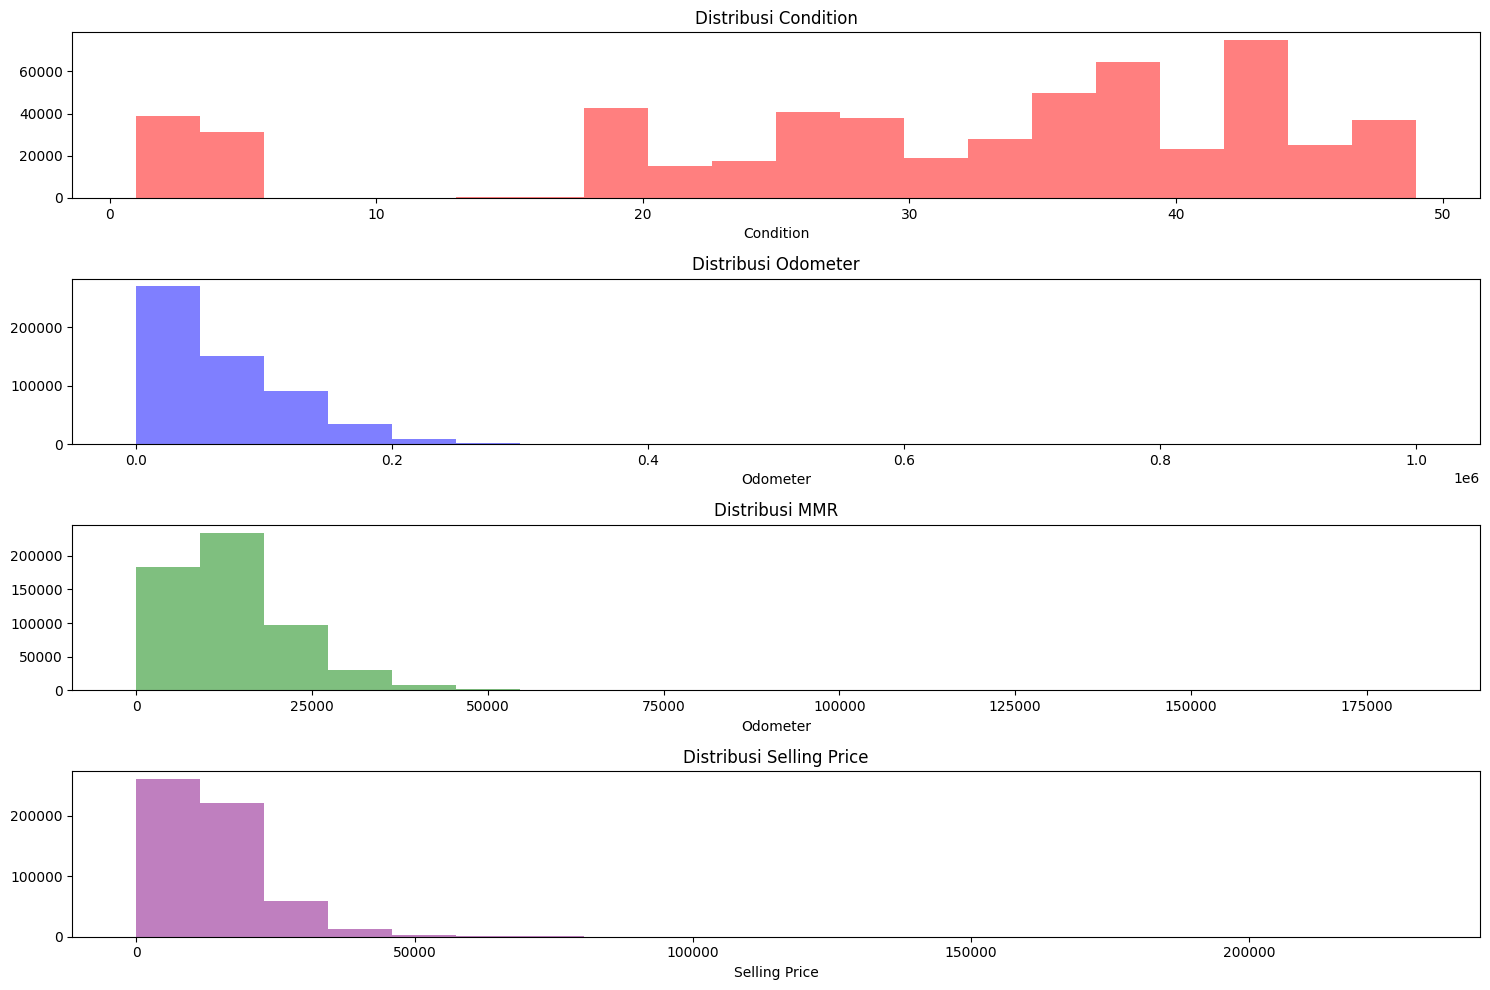

In [8]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.hist(df['condition'].dropna(), bins=20, color='red', alpha=0.5)
plt.title('Distribusi Condition')
plt.xlabel('Condition')

plt.subplot(4, 1, 2)
plt.hist(df['odometer'].dropna(), bins=20, color='blue', alpha=0.5)
plt.title('Distribusi Odometer')
plt.xlabel('Odometer')

plt.subplot(4, 1, 3)
plt.hist(df['mmr'].dropna(), bins=20, color='green', alpha=0.5)
plt.title('Distribusi MMR')
plt.xlabel('Odometer')

plt.subplot(4, 1, 4)
plt.hist(df['sellingprice'].dropna(), bins=20, color='purple', alpha=0.5)
plt.title('Distribusi Selling Price')
plt.xlabel('Selling Price')

plt.tight_layout()
plt.show()

Kode diatas menggunakan Matplotlib untuk membuat empat subplot dengan ukuran total 15x10. Setiap subplot menampilkan histogram dari kolom-kolom numerik dalam DataFrame `df`, yaitu 'condition', 'odometer', 'mmr', dan 'sellingprice'.

- Setiap subplot menggunakan `plt.hist()` untuk membuat histogram dari data yang diambil dari kolom yang sesuai. Nilai-nilai yang hilang (NaN) dihapus dengan menggunakan metode `.dropna()` sebelum membuat histogram.
- Parameter `bins=20` digunakan untuk menentukan jumlah bins (pengelompokan) yang digunakan dalam histogram.
- Warna yang berbeda digunakan untuk setiap subplot untuk membedakan antara histogram yang berbeda.
- Alpha digunakan untuk mengatur transparansi histogram.
- Setiap subplot diberi judul yang sesuai dengan kolom yang direpresentasikan dan label sumbu x yang sesuai.

Terakhir, `plt.tight_layout()` digunakan untuk mengatur layout subplot agar lebih rapi, dan `plt.show()` untuk menampilkan plot.

Ini memberikan pemahaman visual tentang distribusi data untuk masing-masing kolom numerik dalam DataFrame `df`.

In [9]:
df['condition'].fillna(df['condition'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)

Kode di atas mengisi nilai-nilai yang hilang (NaN) dalam kolom 'condition', 'odometer', 'mmr', dan 'sellingprice' dari DataFrame `df` dengan nilai median (untuk 'condition') dan nilai rata-rata (untuk kolom lainnya). Proses ini dilakukan dengan menggunakan metode `.fillna()` dari pandas.

- `df['condition'].fillna(df['condition'].median(), inplace=True)`: Mengganti nilai NaN dalam kolom 'condition' dengan nilai median dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai median dari kolom 'condition' dan diaplikasikan ke tempat yang sama (inplace=True).

- `df['odometer'].fillna(df['odometer'].mean(), inplace=True)`: Mengganti nilai NaN dalam kolom 'odometer' dengan nilai rata-rata dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai rata-rata dari kolom 'odometer' dan diaplikasikan ke tempat yang sama (inplace=True).

- `df['mmr'].fillna(df['mmr'].mean(), inplace=True)`: Mengganti nilai NaN dalam kolom 'mmr' dengan nilai rata-rata dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai rata-rata dari kolom 'mmr' dan diaplikasikan ke tempat yang sama (inplace=True).

- `df['sellingprice'].fillna(df['sellingprice'].mean(), inplace=True)`: Mengganti nilai NaN dalam kolom 'sellingprice' dengan nilai rata-rata dari kolom tersebut. Operasi dilakukan dengan menggunakan nilai rata-rata dari kolom 'sellingprice' dan diaplikasikan ke tempat yang sama (inplace=True).

Dengan melakukan ini, nilai-nilai yang hilang dalam kolom-kolom tersebut telah diisi dengan nilai-nilai yang sesuai, yang dapat meningkatkan kegunaan dan keandalan data untuk analisis selanjutnya.

In [10]:
df.isnull().sum()

year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64

Setelah pengisian nilai-nilai yang hilang,  dapat diperiksa apakah masih ada nilai yang hilang dalam DataFrame df dengan menggunakan df.isnull().sum(). Ini akan memberikan jumlah nilai yang hilang dalam setiap kolom DataFrame.

#### **Pembersihan OUTLIER**

In [11]:
numeric_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [12]:
from scipy import stats

z_scores = stats.zscore(df[numeric_columns])
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.shape

(534360, 5)

Kode di atas menghitung skor Z untuk setiap kolom numerik dalam DataFrame `df` yang terdaftar dalam `numeric_columns`. Skor Z adalah ukuran seberapa jauh nilai setiap titik data dari mean dalam satuan deviasi standar. Kemudian, kode tersebut membuat DataFrame baru bernama `clean_df` yang hanya berisi baris-baris di mana semua nilai dalam setiap kolom numerik memiliki skor Z kurang dari 2.5.

Mari kita jelaskan langkah-langkahnya:

1. `from scipy import stats`: Mengimpor modul `stats` dari paket `scipy`. Ini digunakan untuk mengakses fungsi `zscore()` yang diperlukan untuk menghitung skor Z.

2. `z_scores = stats.zscore(df[numeric_columns])`: Menghitung skor Z untuk setiap kolom numerik dalam DataFrame `df` yang terdaftar dalam `numeric_columns`. Ini dilakukan dengan memanggil fungsi `zscore()` dari modul `stats` pada DataFrame `df` dengan menggunakan kolom-kolom yang ditentukan dalam `numeric_columns`.

3. `clean_df = df[(z_scores < 2.5).all(axis=1)]`: Membuat DataFrame baru bernama `clean_df` yang hanya berisi baris-baris di mana semua nilai dalam setiap kolom numerik memiliki skor Z kurang dari 2.5. Ini dilakukan dengan menggunakan boolean indexing pada DataFrame `df`, di mana kita memeriksa setiap baris untuk semua kolom numerik dan memilih baris yang memenuhi kondisi bahwa semua skor Z-nya kurang dari 2.5.

4. `clean_df.shape`: Menampilkan bentuk (jumlah baris dan kolom) dari DataFrame `clean_df`, yang memberikan informasi tentang berapa banyak baris dan kolom yang ada setelah pembersihan data.

Jadi, `clean_df.shape` memberikan jumlah baris dan kolom dalam DataFrame `clean_df`, yang merupakan DataFrame hasil dari pembersihan data dengan menggunakan metode deteksi outlier berdasarkan skor Z.

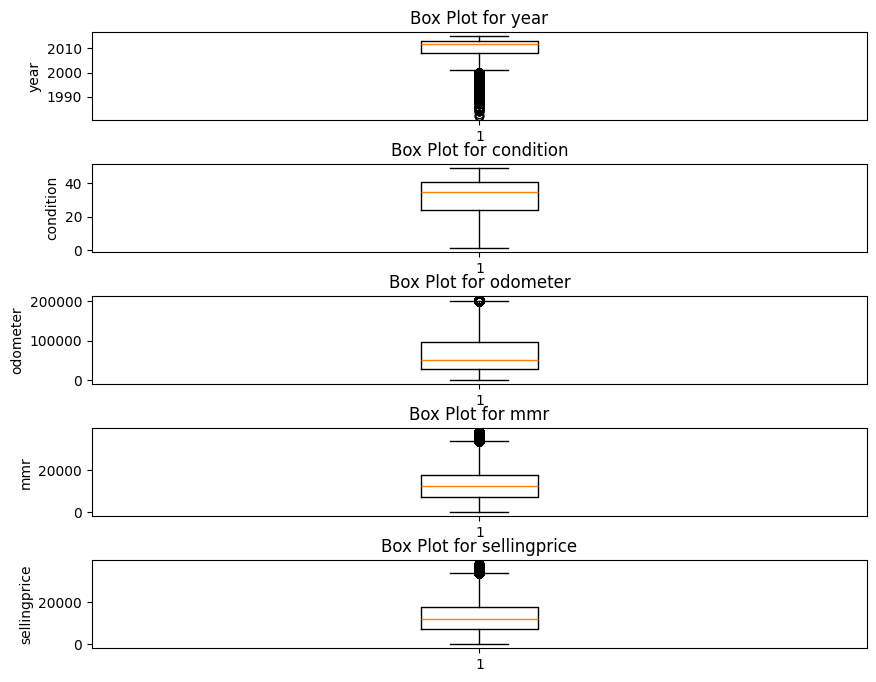

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(clean_df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

Kode di atas membuat subplot untuk setiap kolom numerik dalam DataFrame `clean_df` menggunakan boxplot. Subplot disusun dalam satu kolom (ncols=1) dan lima baris (nrows=5) dengan ukuran keseluruhan gambar 10x8. Jarak antar subplot diatur menggunakan `fig.subplots_adjust(hspace=0.5)`.

Untuk setiap kolom numerik dalam daftar `numeric_columns`:
- `axes[i].boxplot(clean_df[column].dropna())` menggambar boxplot untuk kolom tersebut di subplot yang sesuai.
- `axes[i].set_title(f'Box Plot for {column}')` memberikan judul untuk subplot dengan nama kolom.
- `axes[i].set_ylabel(column)` memberikan label sumbu y untuk subplot dengan nama kolom.

Akhirnya, `plt.show()` digunakan untuk menampilkan plot.

Ini memberikan pemahaman visual tentang distribusi data dan keberadaan outlier dalam setiap kolom numerik dalam DataFrame `clean_df`.

In [14]:
df = clean_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534360 entries, 0 to 558836
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          534360 non-null  int64  
 1   condition     534360 non-null  float64
 2   odometer      534360 non-null  float64
 3   mmr           534360 non-null  float64
 4   sellingprice  534360 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 24.5 MB


Setelah diganti DataFrame df dengan clean_df, sekarang kita akan melihat informasi terbaru tentang struktur DataFrame df dengan menggunakan df.info().

Namun, karena telah diganti DataFrame df dengan clean_df, DataFrame df sekarang akan memiliki jumlah baris dan kolom yang berbeda dari sebelumnya, dan nilai-nilai yang hilang atau outlier sudah dihapus.

In [15]:
df

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
5,2015,1.0,5554.0,15350.0,10900.0
...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0
558833,2012,5.0,54393.0,30200.0,30800.0
558834,2012,48.0,50561.0,29800.0,34000.0
558835,2015,38.0,16658.0,15100.0,11100.0


## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) adalah suatu pendekatan analisis data yang digunakan untuk memahami karakteristik utama dari dataset yang diberikan. Tujuan utama dari EDA adalah untuk mengungkapkan struktur dan pola dalam data melalui teknik visualisasi dan ringkasan statistik. Ini membantu analis data untuk memahami sifat-sifat intrinsik dari data, menemukan hubungan antara variabel, mengidentifikasi anomali atau pola menarik, dan merumuskan hipotesis yang mungkin untuk diuji lebih lanjut.

Beberapa teknik umum yang digunakan dalam EDA meliputi:
- Visualisasi data: seperti histogram, scatter plot, box plot, dan heatmaps untuk menampilkan distribusi, hubungan, dan pola dalam data.
- Statistik deskriptif: seperti mean, median, standar deviasi, dan persentil untuk memberikan ringkasan statistik tentang data.
- Analisis korelasi: untuk mengeksplorasi hubungan antara variabel menggunakan koefisien korelasi atau metode lainnya.
- Analisis frekuensi: untuk memahami distribusi dan frekuensi kemunculan nilai-nilai dalam variabel kategorikal.

EDA merupakan langkah awal yang penting dalam proses analisis data, karena membantu untuk mengidentifikasi pertanyaan yang relevan, menentukan metode analisis yang sesuai, dan menghasilkan wawasan awal yang dapat digunakan untuk pengambilan keputusan lebih lanjut.


**1. Feature Understanding**

Feature understanding adalah proses memahami variabel atau fitur (features) yang ada dalam dataset. Ini melibatkan pemahaman mendalam tentang setiap variabel, termasuk karakteristik, makna, dan pengaruhnya terhadap fenomena yang diamati.

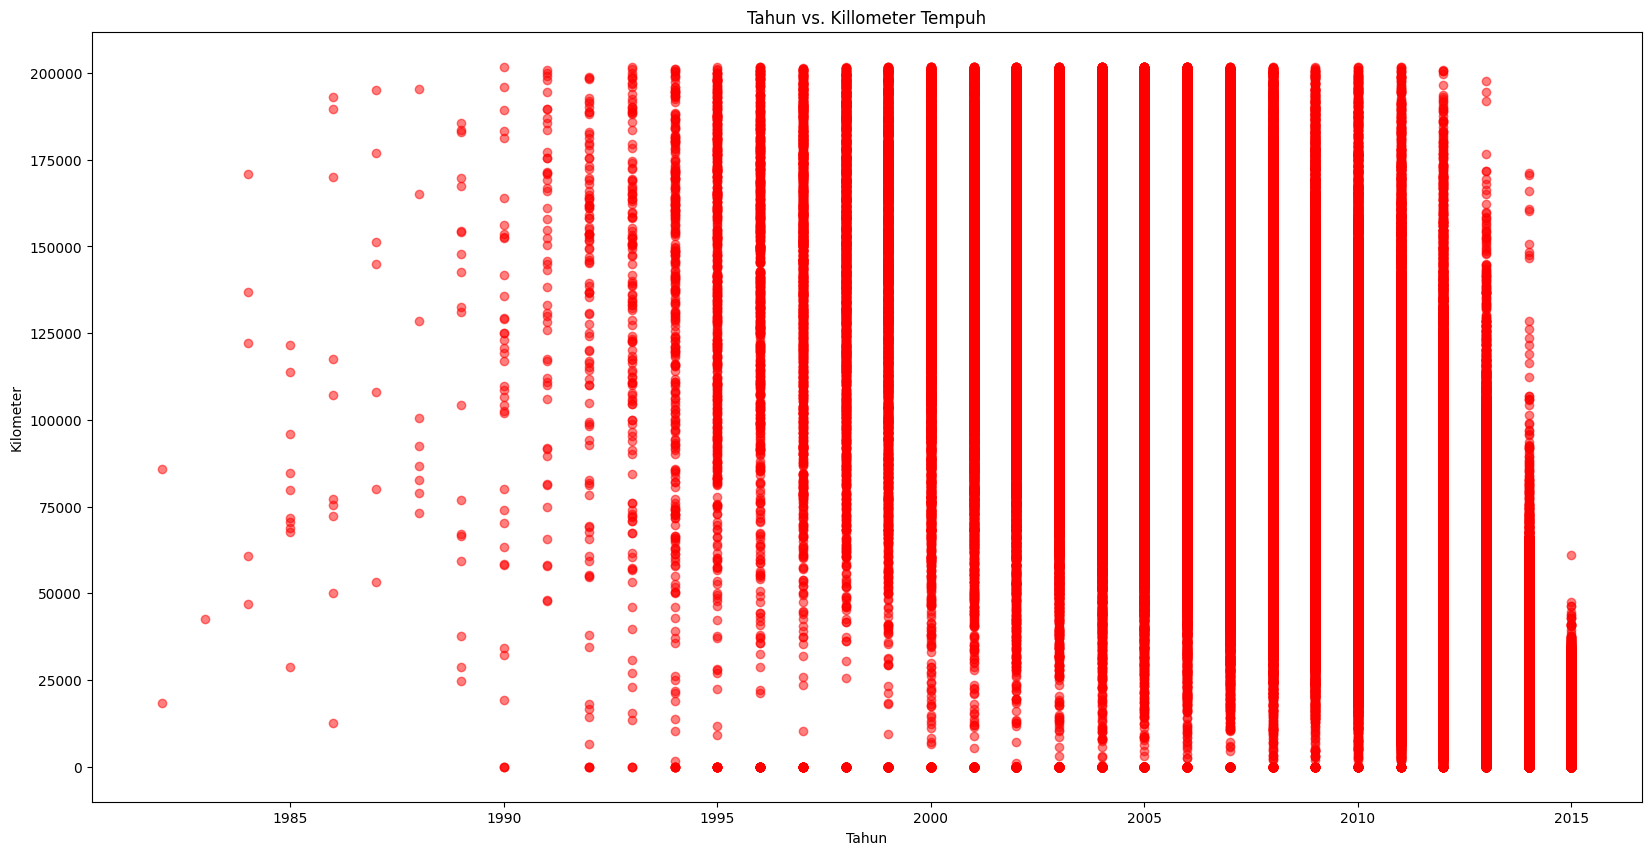

In [16]:
plt.figure(figsize=(20, 10))

plt.scatter(df['year'], df['odometer'], alpha=0.5, c='red')
plt.title('Tahun vs. Killometer Tempuh')
plt.xlabel('Tahun')
plt.ylabel('Kilometer')
plt.show()

Potongan kode tersebut adalah untuk membuat scatter plot yang menampilkan hubungan antara variabel 'year' (tahun) dan 'odometer' (kilometer tempuh) dari DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `plt.figure(figsize=(20, 10))`: Mendefinisikan ukuran gambar (figure) dengan panjang 20 inch dan lebar 10 inch menggunakan `figsize`. Ini memungkinkan untuk mengontrol ukuran plot yang dihasilkan.

2. `plt.scatter(df['year'], df['odometer'], alpha=0.5, c='red')`: Membuat scatter plot dengan menggunakan nilai 'year' sebagai sumbu x dan nilai 'odometer' sebagai sumbu y. Setiap titik dalam plot akan mewakili satu data kendaraan dalam DataFrame `df`. Parameter `alpha=0.5` digunakan untuk mengatur transparansi titik-titik sehingga plot lebih mudah dibaca jika ada tumpang tindih. Parameter `c='red'` digunakan untuk menetapkan warna merah pada titik-titik dalam plot.

3. `plt.title('Tahun vs. Kilometer Tempuh')`: Menetapkan judul untuk plot, yaitu 'Tahun vs. Kilometer Tempuh'. Ini membantu dalam memberikan konteks tentang apa yang ditampilkan dalam plot.

4. `plt.xlabel('Tahun')`: Menetapkan label sumbu x sebagai 'Tahun'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu x.

5. `plt.ylabel('Kilometer')`: Menetapkan label sumbu y sebagai 'Kilometer'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu y.

6. `plt.show()`: Menampilkan plot yang telah dibuat. Ini adalah langkah terakhir dalam membuat plot dan menampilkan hasilnya kepada pengguna.

Dengan demikian, potongan kode tersebut menghasilkan scatter plot yang memvisualisasikan hubungan antara tahun pembuatan kendaraan dan jarak tempuhnya. Plot ini membantu dalam pemahaman visual tentang pola dan tren dalam data.

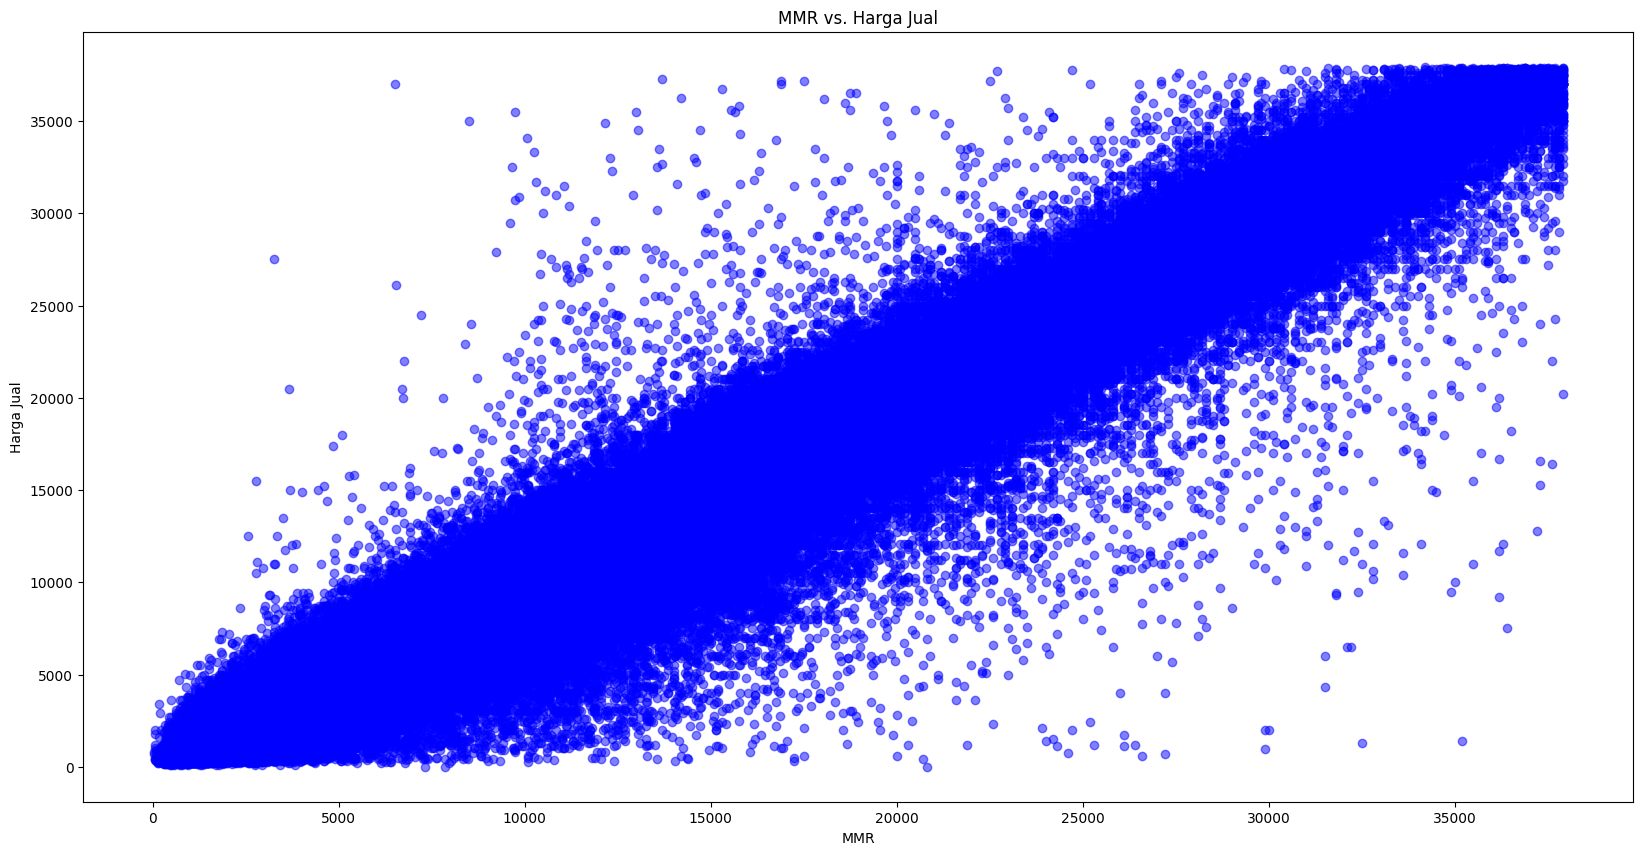

In [17]:
plt.figure(figsize=(20, 10))

plt.scatter(df['mmr'], df['sellingprice'], alpha=0.5, c='blue')
plt.title('MMR vs. Harga Jual')
plt.xlabel('MMR')
plt.ylabel('Harga Jual')
plt.show()

Potongan kode tersebut adalah untuk membuat scatter plot yang menampilkan hubungan antara variabel 'mmr' (Laporan Pasar Manheim) dan 'sellingprice' (Harga Jual) dari DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `plt.figure(figsize=(20, 10))`: Mendefinisikan ukuran gambar (figure) dengan panjang 20 inch dan lebar 10 inch menggunakan `figsize`. Ini memungkinkan untuk mengontrol ukuran plot yang dihasilkan.

2. `plt.scatter(df['mmr'], df['sellingprice'], alpha=0.5, c='blue')`: Membuat scatter plot dengan menggunakan nilai 'mmr' sebagai sumbu x dan nilai 'sellingprice' sebagai sumbu y. Setiap titik dalam plot akan mewakili satu data kendaraan dalam DataFrame `df`. Parameter `alpha=0.5` digunakan untuk mengatur transparansi titik-titik sehingga plot lebih mudah dibaca jika ada tumpang tindih. Parameter `c='blue'` digunakan untuk menetapkan warna biru pada titik-titik dalam plot.

3. `plt.title('MMR vs. Harga Jual')`: Menetapkan judul untuk plot, yaitu 'MMR vs. Harga Jual'. Ini membantu dalam memberikan konteks tentang apa yang ditampilkan dalam plot.

4. `plt.xlabel('MMR')`: Menetapkan label sumbu x sebagai 'MMR'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu x.

5. `plt.ylabel('Harga Jual')`: Menetapkan label sumbu y sebagai 'Harga Jual'. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu y.

6. `plt.show()`: Menampilkan plot yang telah dibuat. Ini adalah langkah terakhir dalam membuat plot dan menampilkan hasilnya kepada pengguna.

Dengan demikian, potongan kode tersebut menghasilkan scatter plot yang memvisualisasikan hubungan antara nilai MMR dan harga jual kendaraan. Plot ini membantu dalam pemahaman visual tentang pola dan tren dalam data terkait dengan nilai pasar dan harga jual kendaraan.

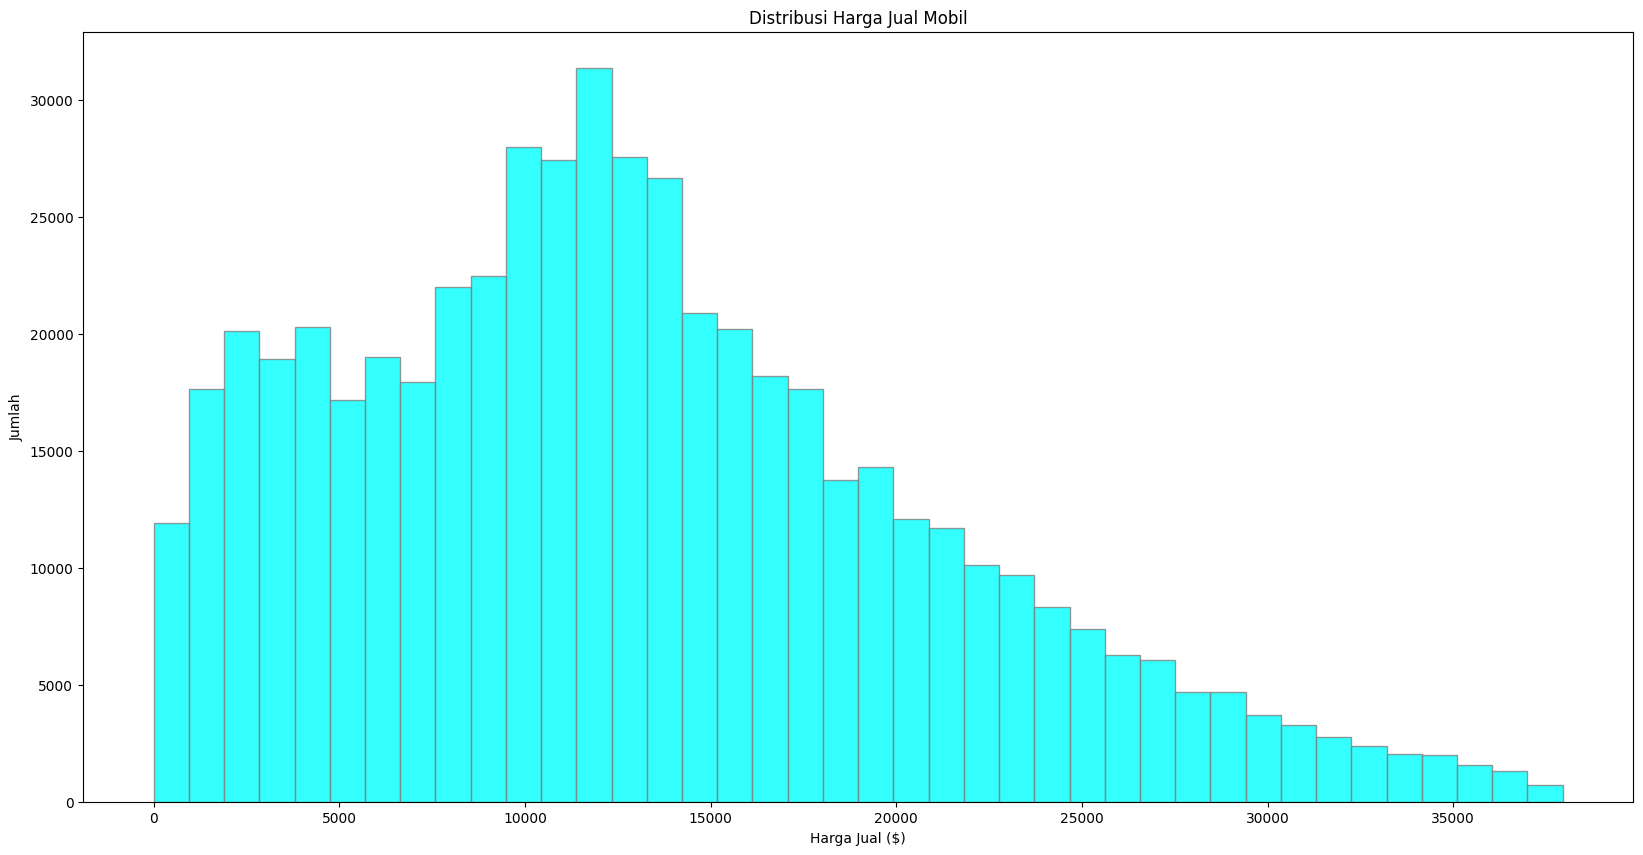

In [18]:
plt.figure(figsize=(20, 10))

plt.hist(df['sellingprice'], alpha=0.8, bins=40, color='cyan', edgecolor='grey')
plt.title('Distribusi Harga Jual Mobil')
plt.xlabel('Harga Jual ($)')
plt.ylabel('Jumlah')
plt.show()

Potongan kode tersebut digunakan untuk membuat histogram yang menampilkan distribusi harga jual mobil dari DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `plt.figure(figsize=(20, 10))`: Mendefinisikan ukuran gambar (figure) dengan panjang 20 inci dan lebar 10 inci menggunakan `figsize`. Ini memungkinkan untuk mengontrol ukuran plot yang dihasilkan.

2. `plt.hist(df['sellingprice'], alpha=0.8, bins=40, color='cyan', edgecolor='grey')`: Membuat histogram dari data harga jual ('sellingprice'). Parameter `alpha=0.8` digunakan untuk mengatur transparansi histogram sehingga lebih mudah dibaca. Parameter `bins=40` menentukan jumlah bin atau interval yang akan digunakan dalam histogram. Parameter `color='cyan'` digunakan untuk menetapkan warna cyan pada histogram. Parameter `edgecolor='grey'` digunakan untuk menetapkan warna abu-abu pada tepi histogram.

3. `plt.title('Distribusi Harga Jual Mobil')`: Menetapkan judul untuk plot, yaitu 'Distribusi Harga Jual Mobil'. Ini membantu dalam memberikan konteks tentang apa yang ditampilkan dalam plot.

4. `plt.xlabel('Harga Jual ($)')`: Menetapkan label sumbu x sebagai 'Harga Jual ($)', yang merupakan unit dalam dolar. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu x.

5. `plt.ylabel('Jumlah')`: Menetapkan label sumbu y sebagai 'Jumlah', yang merupakan jumlah observasi atau frekuensi dalam setiap bin. Ini memberikan informasi tentang variabel yang ditampilkan pada sumbu y.

6. `plt.show()`: Menampilkan histogram yang telah dibuat. Ini adalah langkah terakhir dalam membuat plot dan menampilkan hasilnya kepada pengguna.

Dengan demikian, potongan kode tersebut menghasilkan histogram yang memvisualisasikan distribusi harga jual mobil dalam dataset. Histogram ini membantu dalam pemahaman tentang sebaran harga jual dan frekuensi kemunculan nilai-nilai harga jual dalam data.

**2. Correlation Matrix**

Matriks korelasi adalah representasi visual dari hubungan antara variabel dalam sebuah dataset. Ini adalah tabel yang menunjukkan koefisien korelasi antara setiap pasangan variabel dalam dataset. Koefisien korelasi mengukur seberapa erat hubungan linier antara dua variabel, dengan nilai yang berkisar antara -1 hingga 1:

- Nilai 1 menunjukkan korelasi positif sempurna, yang berarti bahwa kedua variabel bergerak searah secara linier.
- Nilai -1 menunjukkan korelasi negatif sempurna, yang berarti bahwa kedua variabel bergerak berlawanan arah secara linier.
- Nilai 0 menunjukkan tidak adanya korelasi linier antara variabel, meskipun bisa saja ada hubungan non-linier.

Matriks korelasi biasanya disajikan dalam bentuk tabel persegi, di mana setiap sel diisi dengan koefisien korelasi antara dua variabel yang sesuai. Seringkali, matriks korelasi diwakili secara visual dengan warna, di mana nilai yang lebih tinggi atau lebih positif ditampilkan dengan warna yang lebih terang, sementara nilai yang lebih rendah atau lebih negatif ditampilkan dengan warna yang lebih gelap.

Matriks korelasi adalah alat yang berguna dalam analisis data karena membantu dalam mengidentifikasi hubungan antara variabel, memahami pola dalam data, dan menentukan variabel mana yang paling berpengaruh dalam menjelaskan variasi dalam dataset. Ini juga dapat digunakan untuk memilih variabel yang paling relevan dalam pemodelan statistik atau machine learning.

In [19]:
corr_matrix = df[numeric_columns].dropna().corr()
corr_matrix

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.304472,-0.786131,0.653318,0.638587
condition,0.304472,1.000000,-0.287774,0.286182,0.336134
odometer,-0.786131,-0.287774,1.000000,-0.655649,-0.646952
mmr,0.653318,0.286182,-0.655649,1.000000,0.978421
sellingprice,0.638587,0.336134,-0.646952,0.978421,1.000000


Potongan kode tersebut digunakan untuk menghasilkan matriks korelasi antara variabel numerik dalam DataFrame `df`. Berikut adalah penjelasan untuk setiap baris kode:

1. `df[numeric_columns]`: Memilih kolom-kolom numerik dalam DataFrame `df`. `numeric_columns` adalah daftar nama kolom yang berisi variabel numerik yang ingin dimasukkan ke dalam analisis korelasi. Ini memastikan bahwa hanya variabel numerik yang akan digunakan dalam perhitungan korelasi.

2. `.dropna()`: Metode ini digunakan untuk menghapus baris yang mengandung nilai null dari DataFrame yang dipilih. Ini diperlukan untuk memastikan bahwa korelasi hanya dihitung dari data yang lengkap, karena korelasi tidak dapat dihitung jika ada nilai null dalam dataset.

3. `.corr()`: Metode ini digunakan untuk menghitung matriks korelasi antara variabel-variabel numerik yang dipilih. Ini menghasilkan tabel persegi yang menunjukkan koefisien korelasi antara setiap pasangan variabel. Setiap sel di dalam matriks akan berisi koefisien korelasi antara dua variabel yang sesuai. 

Jadi, `corr_matrix` akan berisi matriks korelasi yang menunjukkan seberapa erat hubungan linier antara setiap pasangan variabel numerik dalam DataFrame `df`. Ini membantu dalam memahami hubungan antara variabel dan dapat memberikan wawasan tentang bagaimana variabel-variabel tersebut berkaitan satu sama lain dalam dataset.

<Axes: >

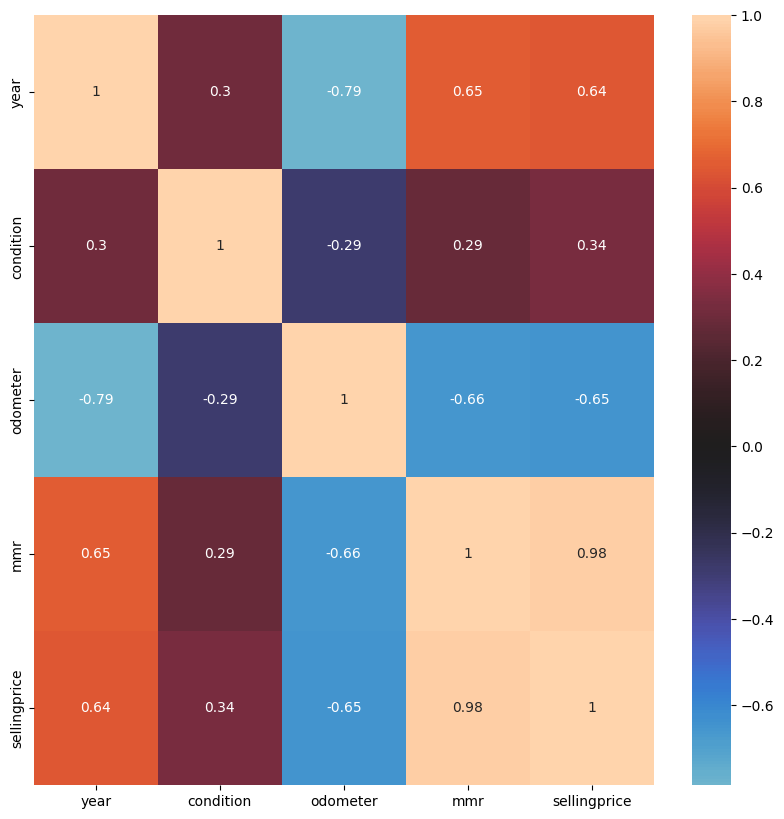

In [20]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True, center=0)

1. `import seaborn as sns`: Saya mengimpor modul seaborn dengan alias 'sns'. Seaborn adalah sebuah library Python yang saya gunakan untuk membuat visualisasi data statistik.

2. `plt.figure(figsize=(10,10))`: Saya membuat sebuah figure dengan ukuran 10x10 menggunakan modul matplotlib.pyplot (biasanya diimpor sebagai 'plt'). Ini mempersiapkan ruang untuk menggambar heatmap.

3. `sns.heatmap(corr_matrix,annot=True, center=0)`: Saya menggambar heatmap berdasarkan matriks korelasi `corr_matrix` yang telah saya definisikan sebelumnya. `annot=True` menandakan bahwa nilai dari setiap sel dalam heatmap akan ditampilkan di atasnya. `center=0` menetapkan titik tengah warna heatmap pada nilai 0.

Tujuan dari penulisan kode tersebut adalah untuk memvisualisasikan pola korelasi antara variabel-variabel dalam dataset yang direpresentasikan oleh `corr_matrix`. Heatmap merupakan salah satu cara yang baik untuk memahami korelasi antara variabel dalam bentuk grafis yang mudah dipahami. Dengan menggunakan warna, kita bisa dengan mudah melihat pola korelasi yang kuat atau lemah antara variabel-variabel tersebut.

#### **Kesimpulan EDA**

1. **Pemahaman Atribut Data**: EDA memungkinkan untuk memahami atribut-atribut data dengan lebih baik. Dari informasi yang diberikan sebelumnya, kita telah mengidentifikasi atribut-atribut numerik dan kategorikal dalam dataset, seperti tahun pembuatan kendaraan, kondisi, jarak tempuh, harga jual, dan atribut-atribut lainnya. Ini membantu dalam memahami karakteristik utama dari dataset.

2. **Visualisasi dan Analisis Distribusi**: EDA memungkinkan untuk memvisualisasikan distribusi dari berbagai atribut dalam dataset. Dengan menggunakan histogram dan scatter plot, kita dapat melihat distribusi dan pola hubungan antara variabel seperti kondisi, jarak tempuh, harga jual, dan lain-lain. Misalnya, dari histogram distribusi harga jual mobil, kita dapat melihat bagaimana harga jual mobil tersebar dalam dataset.

3. **Identifikasi Anomali dan Pola Menarik**: Melalui visualisasi data dan ringkasan statistik, EDA dapat membantu dalam mengidentifikasi anomali atau pola menarik dalam dataset. Misalnya, dengan memeriksa scatter plot antara tahun pembuatan dan jarak tempuh kendaraan, kita dapat mengidentifikasi kendaraan-kendaraan dengan jarak tempuh yang tidak biasa untuk tahun pembuatannya.

4. **Korelasi Antar Variabel**: EDA juga memungkinkan untuk mengeksplorasi korelasi antara variabel-variabel dalam dataset. Dengan membuat matriks korelasi dan heatmap, kita dapat melihat seberapa erat hubungan antara variabel-variabel numerik, seperti korelasi antara MMR (Laporan Pasar Manheim) dan harga jual kendaraan.

5. **Pembersihan dan Pemrosesan Data**: EDA juga dapat membantu dalam mengidentifikasi dan menangani nilai-nilai yang hilang atau outlier dalam dataset. Melalui langkah-langkah pembersihan data seperti pengisian nilai yang hilang dan deteksi outlier, kita dapat memastikan kualitas data yang lebih baik sebelum melakukan analisis lebih lanjut.

Dengan demikian, EDA adalah langkah yang penting dalam proses analisis data yang membantu dalam memahami dataset, mengidentifikasi pola dan anomali, serta mempersiapkan data untuk analisis lebih lanjut atau pemodelan. Itu juga dapat memberikan wawasan yang berharga yang dapat digunakan dalam pengambilan keputusan dan pemecahan masalah.


Beberapa kesimpulan yang dapat diambil dari korelasi matriks diatas adalah
1. 'year' dan 'sellingprice' memiliki korelasi positif yang berarti mobil yang lebih baru memiliki harga yang lebih mahal
2. 'year' dan 'odometer' memiiki korelasi negatif, yang berarti semakin tua mobil, semakin tinggi kilometer yang ditempuh
3. 'mmr' dan 'sellingprice' memiliki korelasi positif yang kuat, yang berarti semakin tinggi MMR, semakin tinggi harga jual

## **Hierarchical Clustring**

Hierarchical clustering adalah salah satu metode dalam analisis klaster (clustering) yang digunakan untuk mengelompokkan data ke dalam kelompok berdasarkan kemiripan mereka. Metode ini membangun hirarki dari klaster dengan berbagai tingkatan, di mana setiap data awal dimulai sebagai satu klaster sendiri dan kemudian digabungkan berdasarkan kemiripan mereka. Hierarchical clustering dapat dilakukan dalam dua cara: agglomerative (bottom-up) dan divisive (top-down). Namun, di sini saya akan menjelaskan secara khusus tentang pendekatan agglomerative karena lebih umum digunakan.

Berikut adalah langkah-langkah dalam hierarchical clustering secara detail:

1. **Inisialisasi Klaster**: Setiap titik data awal dianggap sebagai klaster tunggal. Jadi, jika kita memiliki n titik data, kita akan memiliki n klaster awal.

2. **Perhitungan Kemiripan**: Kemiripan antara klaster perlu dihitung. Kemiripan bisa diukur dengan berbagai metode, seperti jarak Euclidean, jarak Manhattan, korelasi, atau metode lainnya, tergantung pada jenis data dan kebutuhan analisis.

3. **Gabung Klaster**: Klaster yang memiliki kemiripan tertinggi akan digabungkan menjadi satu klaster baru. Proses ini dilakukan secara iteratif hingga semua titik data berada dalam satu klaster besar.

4. **Update Matriks Kemiripan**: Setelah penggabungan klaster, matriks kemiripan perlu diperbarui untuk mencerminkan perubahan klaster. Terkadang, ada metode yang memperbarui matriks kemiripan secara eksplisit, sementara metode lainnya memperbarui matriks secara implisit.

5. **Iterasi**: Langkah-langkah 2-4 diulang sampai hanya satu klaster besar yang tersisa, atau sampai kriteria penghentian tertentu tercapai. Kriteria penghentian bisa berupa jumlah klaster yang diinginkan, jarak antar klaster tertentu, atau peningkatan kemiripan yang tidak signifikan antar iterasi.

6. **Visualisasi Dendrogram**: Hasil akhir dari hierarchical clustering biasanya direpresentasikan dalam bentuk dendrogram. Dendrogram adalah diagram pohon yang menunjukkan bagaimana klaster digabungkan seiring berjalannya iterasi. Ini membantu dalam memahami struktur hirarki klaster yang dihasilkan.

Kelebihan dari hierarchical clustering adalah kemampuannya untuk memberikan struktur hirarkis yang lebih terstruktur dan dapat diinterpretasi. Namun, kerugiannya adalah kompleksitasnya yang cenderung tinggi, terutama saat menangani jumlah data yang besar, serta sensitivitas terhadap metrik jarak dan pemilihan jumlah klaster yang optimal.

In [21]:
df.head()

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
5,2015,1.0,5554.0,15350.0,10900.0


In [22]:
cols = list(df.columns.values)
cols.pop(cols.index('condition'))
df = df[cols+['condition']]

cols = list(df.columns.values)
cols.pop(cols.index('odometer'))
df = df[cols+['odometer']]

cols = list(df.columns.values)
cols.pop(cols.index('sellingprice'))
df = df[cols+['sellingprice']]

df.head()

,year,mmr,condition,odometer,sellingprice
0,2015,20500.0,5.0,16639.0,21500.0
1,2015,20800.0,5.0,9393.0,21500.0
2,2014,31900.0,45.0,1331.0,30000.0
3,2015,27500.0,41.0,14282.0,27750.0
5,2015,15350.0,1.0,5554.0,10900.0


Kode di atas memiliki tujuan untuk memindahkan kolom 'condition', 'odometer', dan 'sellingprice' ke posisi terakhir dalam DataFrame `df`. 

Ini dilakukan dengan cara menghapus kolom yang bersangkutan dari daftar kolom (`cols`), kemudian menambahkannya kembali ke DataFrame di posisi terakhir.

Berikut adalah langkah-langkahnya:

1. Pertama, kode mengonversi nama kolom DataFrame ke dalam daftar Python menggunakan `list(df.columns.values)`. Ini disimpan dalam variabel `cols`.

2. Kemudian, kode menghapus kolom yang ingin dipindahkan dari daftar kolom menggunakan `cols.pop(cols.index('nama_kolom'))`, di mana 'nama_kolom' adalah nama kolom yang ingin dipindahkan.

3. Setelah itu, kode memindahkan kolom yang telah dihapus ke posisi terakhir dalam daftar kolom dengan menambahkannya kembali ke daftar menggunakan `df = df[cols+['nama_kolom']]`.

4. Langkah-langkah ini diulangi untuk setiap kolom yang ingin dipindahkan.

5. Terakhir, `df.head()` digunakan untuk menampilkan lima baris pertama DataFrame `df` yang telah dimodifikasi dengan perubahan urutan kolom.



In [23]:
X = df.iloc[:,2:5].values
X

array([[5.0000e+00, 1.6639e+04, 2.1500e+04],
       [5.0000e+00, 9.3930e+03, 2.1500e+04],
       [4.5000e+01, 1.3310e+03, 3.0000e+04],
       ...,
       [4.8000e+01, 5.0561e+04, 3.4000e+04],
       [3.8000e+01, 1.6658e+04, 1.1100e+04],
       [3.4000e+01, 1.5008e+04, 2.6700e+04]])

Kode `X = df.iloc[:,2:5].values` digunakan untuk mengambil nilai-nilai dari kolom-kolom yang memiliki indeks 2 hingga 4 dari DataFrame `df`, kemudian disimpan dalam variabel `X`.

Penjelasan langkah-langkahnya adalah sebagai berikut:

1. `df.iloc[:,2:5]`: Ini mengambil subset dari DataFrame `df` dengan menggunakan metode `iloc` untuk indexing berbasis posisi. Dalam hal ini, `:` pada indeks pertama berarti memilih semua baris, sedangkan `2:5` pada indeks kedua berarti memilih kolom-kolom dengan indeks 2 hingga 4 (kolom ke-3 hingga ke-5 dalam urutan Python yang dimulai dari 0). Ini mencakup kolom 'odometer', 'mmr', dan 'sellingprice'.

2. `.values`: Ini mengonversi DataFrame subset yang dipilih menjadi array NumPy, sehingga hanya nilai-nilai yang sebenarnya yang diambil, bukan indeks dan label kolomnya.

Hasil dari operasi ini adalah array NumPy `X` yang berisi nilai-nilai dari kolom-kolom yang telah dipilih. Array ini siap digunakan dalam proses analisis selanjutnya, seperti pemodelan atau klasterisasi.

In [24]:
from sklearn.preprocessing import StandardScaler
Normalisasi = StandardScaler().fit_transform(df)
Normalisasi


scaler = StandardScaler()

scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns= df.columns)
scaled_df.head()

,year,mmr,condition,odometer,sellingprice
0,1.272667,0.939285,-1.969950,-1.054183,1.074765
1,1.272667,0.977743,-1.969950,-1.209821,1.074765
2,1.011791,2.400677,1.075161,-1.382986,2.150776
3,1.272667,1.836631,0.770650,-1.104809,1.865949
4,1.272667,0.279095,-2.274461,-1.292279,-0.267085


1. **Pra-pemrosesan Data dengan StandardScaler**:
   
   Saya menggunakan `StandardScaler` dari pustaka scikit-learn untuk melakukan normalisasi data. Normalisasi adalah proses yang penting dalam analisis data untuk memastikan bahwa semua fitur memiliki skala yang serupa. Dalam hal ini, saya menggunakan metode standar normalisasi yang mengubah setiap fitur sehingga memiliki rata-rata nol dan standar deviasi satu.
   
   ```python
   from sklearn.preprocessing import StandardScaler
   Normalisasi = StandardScaler().fit_transform(df)
   Normalisasi
   ```
   
   Dengan menggunakan metode `fit_transform()` dari `StandardScaler`, saya mentransformasikan data `df` Anda ke dalam skala yang telah dinormalisasi. Hasil dari transformasi ini adalah array numpy yang berisi data yang sudah dinormalisasi.

2. **Normalisasi dengan Scikit-Learn dan Pembuatan DataFrame**:
   
   Saya juga melakukan normalisasi data `df` menggunakan `StandardScaler` dan kemudian mengubah hasil normalisasi ini menjadi DataFrame menggunakan pustaka pandas. Ini berguna karena seringkali kita perlu menjaga struktur data dalam bentuk DataFrame setelah normalisasi untuk keperluan analisis lebih lanjut.

   ```python
   scaler = StandardScaler()
   scaler.fit(df)
   scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
   scaled_df.head()
   ```
   
   Pertama, saya membuat objek `StandardScaler` dengan memanggil konstruktor kelas `StandardScaler()`. Kemudian, saya menggunakan metode `fit()` pada objek scaler ini untuk menghitung rata-rata dan standar deviasi dari setiap fitur dalam data `df`. Setelah itu, saya menggunakan metode `transform()` untuk melakukan normalisasi pada data `df`, dan mengubah hasil normalisasi ini menjadi DataFrame baru dengan nama kolom yang sama seperti data aslinya.

kode di atas untuk melakukan normalisasi data saya agar sesuai dengan skala yang seragam, yang penting untuk mencegah fitur-fitur dengan skala yang lebih besar mendominasi dalam proses pembelajaran mesin. Normalisasi ini dapat membantu meningkatkan performa model machine learning Anda dengan memastikan bahwa setiap fitur diperlakukan secara merata. Selain itu, dengan mengubah hasil normalisasi ke dalam DataFrame, kita dapat terus menggunakan struktur data yang sudah kita kenali untuk analisis data lebih lanjut.

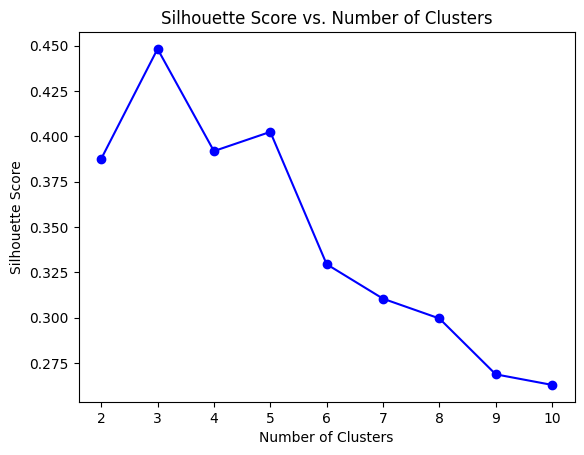

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Memuat dataset dengan pembatasan jumlah baris
# Misalnya, hanya memuat 1000 baris pertama
data_limit = 1000
subset_data = Normalisasi[:data_limit]

cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(subset_data)
    silhouette_avg = silhouette_score(subset_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


Baris kode di atas melakukan analisis clustering dengan menggunakan algoritma Hierarchical Clustering menggunakan metode Agglomerative Clustering dari library Scikit-learn. Berikut adalah penjelasan baris kode tersebut:

1. `from sklearn.cluster import AgglomerativeClustering`: Baris ini mengimpor kelas AgglomerativeClustering dari modul sklearn.cluster, yang digunakan untuk menerapkan algoritma hierarchical clustering.

2. `from sklearn.metrics import silhouette_score`: Baris ini mengimpor fungsi silhouette_score dari modul sklearn.metrics, yang digunakan untuk menghitung skor silhouette dari hasil clustering.

3. `import numpy as np`: Baris ini mengimpor library numpy dengan alias 'np'. Numpy digunakan untuk manipulasi array dan operasi numerik lainnya.

4. `data_limit = 1000`: Baris ini mendefinisikan variabel data_limit yang menentukan jumlah maksimal baris data yang akan digunakan dalam proses clustering.

5. `subset_data = Normalisasi[:data_limit]`: Baris ini membuat subset dari data dengan membatasi jumlah barisnya sebanyak data_limit. Misalnya, jika data_limit adalah 1000, maka hanya 1000 baris pertama dari data yang akan digunakan.

6. `cluster_range = range(2, 11)`: Baris ini mendefinisikan rentang jumlah cluster yang akan dicoba, mulai dari 2 hingga 10 cluster.

7. `silhouette_scores = []`: Baris ini membuat sebuah list kosong untuk menyimpan skor silhouette dari setiap jumlah cluster yang dicoba.

8. `for n_clusters in cluster_range:`: Baris ini memulai iterasi melalui setiap jumlah cluster yang telah ditentukan sebelumnya.

9. `hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)`: Baris ini membuat objek AgglomerativeClustering dengan jumlah cluster yang ditentukan.

10. `cluster_labels = hierarchical_clustering.fit_predict(subset_data)`: Baris ini menggunakan metode fit_predict untuk melakukan clustering pada subset_data dan menghasilkan label cluster untuk setiap data dalam subset.

11. `silhouette_avg = silhouette_score(subset_data, cluster_labels)`: Baris ini menghitung skor silhouette untuk hasil clustering yang didapatkan.

12. `silhouette_scores.append(silhouette_avg)`: Baris ini menambahkan skor silhouette ke dalam list silhouette_scores.

13. `plt.plot(cluster_range, silhouette_scores, marker='o', color='blue')`: Baris ini menggambar plot dari skor silhouette terhadap jumlah cluster yang dicoba.

14. `plt.xlabel('Number of Clusters')`: Baris ini memberikan label pada sumbu x.

15. `plt.ylabel('Silhouette Score')`: Baris ini memberikan label pada sumbu y.

16. `plt.title('Silhouette Score vs. Number of Clusters')`: Baris ini memberikan judul pada plot.

17. `plt.show()`: Baris ini menampilkan plot yang telah digambar.

Tujuan dari penulisan keseluruhan kode tersebut adalah untuk melakukan analisis clustering menggunakan algoritma hierarchical clustering dengan memvariasikan jumlah cluster yang dicoba, dan kemudian mengevaluasi performanya menggunakan metrik silhouette score. Plot yang dihasilkan akan memberikan informasi mengenai jumlah cluster yang optimal untuk dataset yang digunakan.

Didapatkan dari visual diatas dimana yang paling optimal adalah 3 cluster.

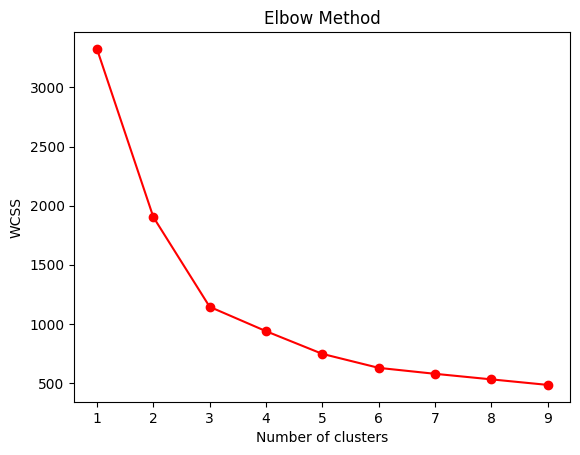

In [30]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

data_limit = 1000
subset_data = Normalisasi[:data_limit]

wcss = []
for i in range(1, 10):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=i)
    cluster_labels = hierarchical_clustering.fit_predict(subset_data)
    centroids = []
    for cluster_label in range(i):
        cluster_points = subset_data[cluster_labels == cluster_label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    wcss.append(np.sum((subset_data - np.array(centroids)[cluster_labels]) ** 2))

plt.plot(np.arange(1, 10), wcss, marker='o', color='red')

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Kode di atas mengimplementasikan metode Elbow untuk menentukan jumlah cluster yang optimal dalam proses clustering menggunakan algoritma Hierarchical Clustering. Berikut adalah penjelasan setiap baris kode:

1. `from sklearn.cluster import AgglomerativeClustering`: Baris ini mengimpor kelas AgglomerativeClustering dari modul sklearn.cluster, yang digunakan untuk menerapkan algoritma hierarchical clustering.

2. `import numpy as np`: Baris ini mengimpor library numpy dengan alias 'np'. Numpy digunakan untuk manipulasi array dan operasi numerik lainnya.

3. `import matplotlib.pyplot as plt`: Baris ini mengimpor modul pyplot dari library matplotlib, yang digunakan untuk membuat plot visualisasi.

4. `data_limit = 1000`: Baris ini mendefinisikan variabel data_limit yang menentukan jumlah maksimal baris data yang akan digunakan dalam proses clustering.

5. `subset_data = Normalisasi[:data_limit]`: Baris ini membuat subset dari data dengan membatasi jumlah barisnya sebanyak data_limit. Misalnya, jika data_limit adalah 1000, maka hanya 1000 baris pertama dari data yang akan digunakan.

6. `wcss = []`: Baris ini membuat sebuah list kosong untuk menyimpan nilai Within-Cluster Sum of Squares (WCSS) untuk setiap jumlah cluster yang dicoba.

7. `for i in range(1, 10):`: Baris ini memulai iterasi dari 1 hingga 9, yang akan digunakan sebagai jumlah cluster yang dicoba.

8. `hierarchical_clustering = AgglomerativeClustering(n_clusters=i)`: Baris ini membuat objek AgglomerativeClustering dengan jumlah cluster yang ditentukan.

9. `cluster_labels = hierarchical_clustering.fit_predict(subset_data)`: Baris ini menggunakan metode fit_predict untuk melakukan clustering pada subset_data dan menghasilkan label cluster untuk setiap data dalam subset.

10. `centroids = []`: Baris ini membuat list kosong untuk menyimpan koordinat centroid dari setiap cluster.

11. `for cluster_label in range(i):`: Baris ini memulai iterasi melalui setiap label cluster.

12. `cluster_points = subset_data[cluster_labels == cluster_label]`: Baris ini menentukan titik-titik yang termasuk dalam cluster dengan label tertentu.

13. `centroid = np.mean(cluster_points, axis=0)`: Baris ini menghitung centroid dari cluster dengan mengambil rata-rata koordinat titik-titik dalam cluster.

14. `centroids.append(centroid)`: Baris ini menambahkan centroid ke dalam list centroids.

15. `wcss.append(np.sum((subset_data - np.array(centroids)[cluster_labels]) ** 2))`: Baris ini menghitung nilai WCSS untuk jumlah cluster yang sedang dicoba dan menambahkannya ke dalam list wcss.

16. `plt.plot(np.arange(1, 10), wcss, marker='o', color='red')`: Baris ini menggambar plot WCSS terhadap jumlah cluster yang dicoba.

17. `plt.title('Elbow Method')`: Baris ini memberikan judul pada plot.

18. `plt.xlabel('Number of clusters')`: Baris ini memberikan label pada sumbu x.

19. `plt.ylabel('WCSS')`: Baris ini memberikan label pada sumbu y.

20. `plt.show()`: Baris ini menampilkan plot yang telah digambar.

Tujuan dari penulisan kode di atas adalah untuk menemukan jumlah cluster yang optimal dengan menggunakan metode Elbow. Plot yang dihasilkan akan menunjukkan titik "elbow" di mana penurunan WCSS mulai melambat, dan titik tersebut dapat digunakan sebagai indikasi jumlah cluster yang optimal untuk dataset yang diberikan. Didapatkan juga jumlah cluster paling optimal adalah 3.

In [34]:
data_limit = 1000
subset_data = Normalisasi[:data_limit]
subset_scaled = scaled_df[:data_limit]
# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(subset_data))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(subset_scaled)

labels = agg_cluster.labels_

# Buat dataframe baru yang hanya berisi subset dari df yang sesuai dengan panjang labels
subset_df = df.iloc[:data_limit].copy()
subset_df['Cluster'] = labels
subset_df.head()


,year,mmr,condition,odometer,sellingprice,Cluster
0,2015,20500.0,5.0,16639.0,21500.0,1
1,2015,20800.0,5.0,9393.0,21500.0,1
2,2014,31900.0,45.0,1331.0,30000.0,0
3,2015,27500.0,41.0,14282.0,27750.0,0
5,2015,15350.0,1.0,5554.0,10900.0,1


Kode di atas melakukan beberapa langkah untuk menerapkan algoritma Agglomerative Clustering pada sebuah dataset. Berikut adalah penjelasan dan tujuan dari setiap baris kode:

1. `data_limit = 1000`: Variabel `data_limit` menentukan jumlah maksimal baris data yang akan digunakan dalam proses clustering. Ini membatasi analisis agar dapat dijalankan pada subset data yang lebih kecil, memudahkan untuk mengelola dan menganalisis proses clustering.

2. `subset_data = Normalisasi[:data_limit]`: Membuat subset dari data yang akan digunakan untuk clustering. Subset ini terdiri dari 1000 baris pertama dari data yang telah dinormalisasi (`Normalisasi`). Normalisasi data sering dilakukan sebelum proses clustering untuk memastikan bahwa setiap fitur memiliki skala yang sama.

3. `subset_scaled = scaled_df[:data_limit]`: Membuat subset dari data yang telah discaling (`scaled_df`) dengan menggunakan batasan `data_limit`. Scaling data sering dilakukan untuk memastikan bahwa perbedaan skala antar fitur tidak mempengaruhi hasil clustering.

4. `dist_matrix = squareform(pdist(subset_data))`: Menghitung matriks jarak antar sampel dalam subset data menggunakan fungsi pairwise_distances (`pdist`) dari library scipy. Hasilnya adalah matriks jarak dalam bentuk matriks persegi yang simetris.

5. `agg_cluster = AgglomerativeClustering(n_clusters=3)`: Membuat objek AgglomerativeClustering dengan jumlah cluster yang ditetapkan sebanyak 3. Algoritma Agglomerative Clustering akan menggabungkan data ke dalam cluster secara bertahap berdasarkan jarak antar data.

6. `agg_cluster.fit(subset_scaled)`: Melatih model Agglomerative Clustering pada data yang telah discaling.

7. `labels = agg_cluster.labels_`: Mendapatkan label cluster untuk setiap sampel dalam data. Setiap sampel akan diberi label yang sesuai dengan cluster tempat sampel tersebut berada.

8. `subset_df = df.iloc[:data_limit].copy()`: Membuat dataframe baru (`subset_df`) yang merupakan subset dari dataframe awal (`df`) sesuai dengan panjang `data_limit`. Karena kita hanya tertarik pada subset data yang digunakan dalam clustering, kita membuat salinan subset dari dataframe asli.

9. `subset_df['Cluster'] = labels`: Menambahkan kolom baru 'Cluster' ke dalam dataframe `subset_df` yang berisi label cluster yang telah ditentukan sebelumnya.

10. `subset_df.head()`: Menampilkan lima baris pertama dari dataframe `subset_df` bersama dengan kolom 'Cluster'. Ini membantu untuk melihat hasil clustering pada subset data secara cepat.

Tujuan dari penulisan keseluruhan kode di atas adalah untuk melakukan clustering menggunakan algoritma Agglomerative Clustering pada subset data yang telah dinormalisasi dan discaling, kemudian menambahkan kolom 'Cluster' yang berisi label cluster ke dalam dataframe untuk analisis lebih lanjut. Dengan cara ini, kita dapat memahami struktur cluster dalam data dan melakukan segmentasi atau analisis lebih lanjut berdasarkan cluster tersebut.

In [37]:
cluster_groups = subset_df.groupby('Cluster')

cluster_statistics = cluster_groups.mean()

cluster_statistics

,year,mmr,condition,odometer,sellingprice
Cluster,,,,,
0,2012.751861,25695.285360,41.535980,25868.781638,25770.347395
1,2013.150000,15941.250000,3.125000,32225.750000,13899.693750
2,2012.764302,13449.370709,36.237986,37459.054920,13062.473684


 tujuan dari kode di atas adalah untuk menghitung statistik rata-rata untuk setiap fitur dalam setiap kelompok klaster, sehingga saya dapat memahami perbedaan dalam pola fitur antara kelompok klaster yang berbeda.`

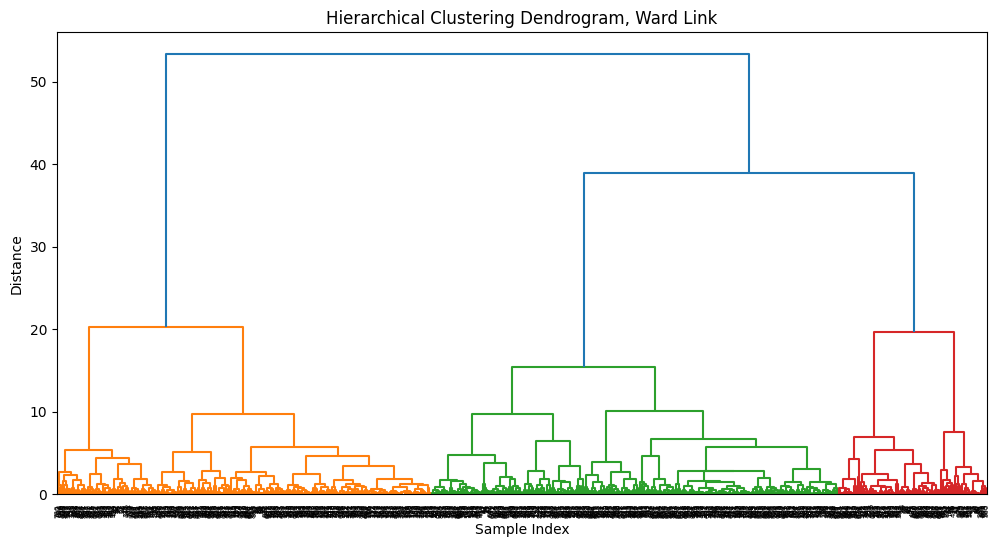

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(subset_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Ward Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

```python
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
```
Saya mengimpor fungsi `dendrogram` dan `linkage` dari modul `scipy.cluster.hierarchy` untuk menghasilkan dan menampilkan dendrogram. Saya juga mengimpor modul `matplotlib.pyplot` untuk membuat plot.

```python
# Compute the linkage matrix
Z = linkage(subset_data, method='ward')
```
Saya menggunakan fungsi `linkage` untuk menghitung matriks linkage dari data yang telah dinormalisasi (`subset_data`). Saya menggunakan metode ward, yang merupakan metode yang umum digunakan dalam hierarchical clustering untuk menghitung jarak antara cluster.

```python
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Ward Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
```
Saya membuat plot dari dendrogram menggunakan fungsi `dendrogram`. Parameter `Z` adalah matriks linkage yang telah dihitung sebelumnya. Saya menentukan judul plot, label sumbu-x (indeks sampel), dan label sumbu-y (jarak) untuk memberikan informasi tambahan tentang dendrogram. Terakhir, Saya menampilkan plot menggunakan `plt.show()`.

Dengan demikian, tujuan dari kode di atas adalah untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode ward untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

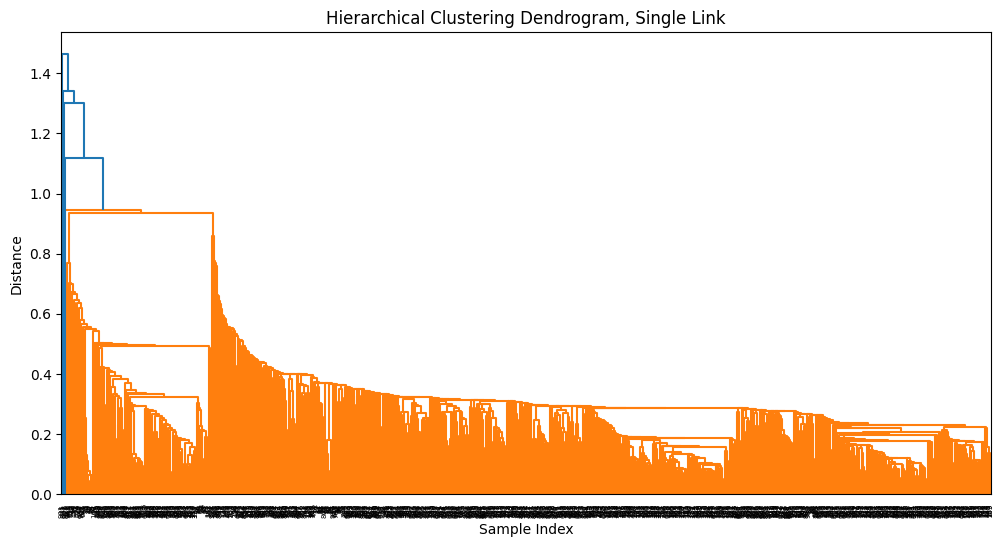

In [39]:
# Compute the linkage matrix
Z = linkage(subset_data, method='single')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Single Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Tujuan dari kode di atas adalah  hampir sama seperti kode sebelumnya yaitu untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode single link untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

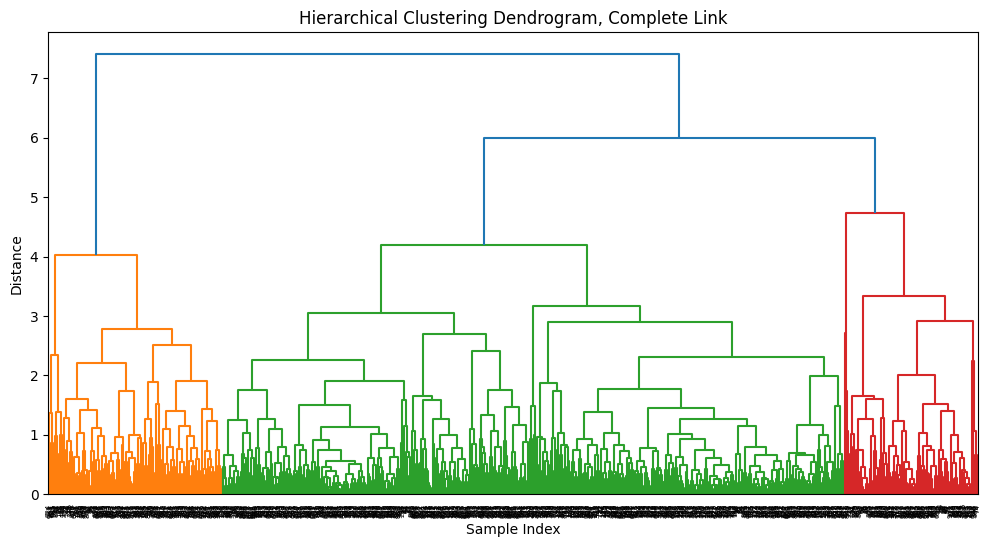

In [40]:
# Compute the linkage matrix
Z = linkage(subset_data, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Complete Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Tujuan dari kode di atas adalah  hampir sama seperti kode sebelumnya yaitu untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode Complete link untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

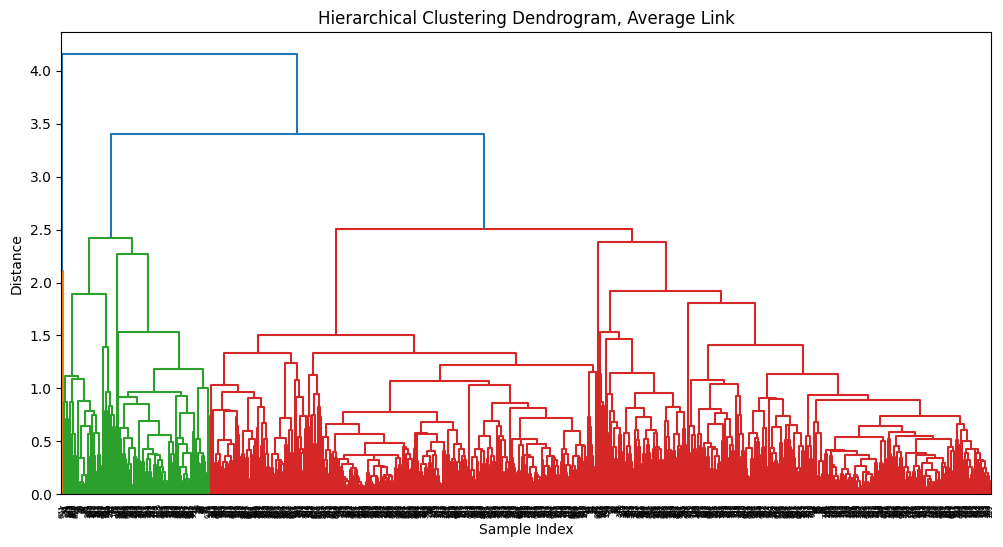

In [41]:
# Compute the linkage matrix
Z = linkage(subset_data, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Average Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Tujuan dari kode di atas adalah  hampir sama seperti kode sebelumnya yaitu untuk menghitung dan menampilkan dendrogram dari hierarchical clustering menggunakan metode Average link untuk data yang telah dinormalisasi. Dendrogram ini dapat membantu Saya memvisualisasikan struktur hierarkis dari cluster yang terbentuk.

In [49]:
import plotly.graph_objs as go



df1 = subset_df[subset_df.Cluster==0]
df2 = subset_df[subset_df.Cluster==1]
df3 = subset_df[subset_df.Cluster==2]

# Definisikan data untuk garis
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
line_trace = go.Scatter3d(x=xline, y=yline, z=zline, mode='lines', line=dict(color='black'), name='Line')

# Definisikan data untuk setiap cluster
scatter_traces = [
    go.Scatter3d(x=df1.condition, y=df1.odometer, z=df1.sellingprice, mode='markers',
                 marker=dict(color='blue', size=5), name='Mobil Lumayan (Lumayan Direkomendasikan)',
                 hovertemplate="<span>condition: %{x}<br>Odometer(jarak tempuh): %{y}m<br>Harga Jual: %{z}<extra></extra></span><span><b> Mobil Lumayan </b><extra></extra></span>"),
    go.Scatter3d(x=df2.condition, y=df2.odometer, z=df2.sellingprice, mode='markers',
                 marker=dict(color='red', size=5), name='Mobil Buruk (Tidak Direkomendasikan)',
                hovertemplate="<span>condition: %{x}<br>Odometer(jarak tempuh): %{y}m<br>Harga Jual: %{z}<extra></extra></span><span><b> Mobil Buruk </b><extra></extra></span>"),
    go.Scatter3d(x=df3.condition, y=df3.odometer, z=df3.sellingprice, mode='markers',
                 marker=dict(color='purple', size=5), name='Mobil Bagus (Sangat Direkomendasikan)',
                hovertemplate="<span>condition: %{x}<br>Odometer(jarak tempuh): %{y}m<br>Harga Jual: %{z}<extra></extra></span><span><b> Mobil Bagus </b><extra></extra></span>"),
]



# Definisikan layout
layout = go.Layout(scene=dict(xaxis=dict(title='Kondisi'), yaxis=dict(title='Jarak Tempuh Mobil'), zaxis=dict(title='Harga Jual Mobil')),
                   margin=dict(l=0, r=0), height=800, width=800, title="Hasil K-Means", legend=dict(x=0, y=1), showlegend=True)

# Definisikan figure
fig = go.Figure(data=[line_trace] + scatter_traces , layout=layout)

# Tampilkan plot
fig.show()


Kode di atas digunakan untuk membuat visualisasi data dalam bentuk plot 3D dengan menggunakan library Plotly. Berikut adalah penjelasan dan tujuan dari setiap bagian kode:

1. `import plotly.graph_objs as go`: Baris ini mengimpor modul `graph_objs` dari library Plotly, yang digunakan untuk membuat berbagai objek grafik.

2. `df1 = subset_df[subset_df.Cluster==0]`: Baris ini membuat subset dataframe `df1` yang berisi data dari cluster 0 (Cluster pertama) yang telah dihasilkan dari proses clustering sebelumnya.

3. `df2 = subset_df[subset_df.Cluster==1]`: Baris ini membuat subset dataframe `df2` yang berisi data dari cluster 1 (Cluster kedua).

4. `df3 = subset_df[subset_df.Cluster==2]`: Baris ini membuat subset dataframe `df3` yang berisi data dari cluster 2 (Cluster ketiga).

5. `xline = np.linspace(0, 15, 1000)`, `yline = np.linspace(0, 15, 1000)`, `zline = np.linspace(0, 15, 1000)`: Baris ini mendefinisikan data untuk garis yang akan digunakan dalam visualisasi. Data ini akan digunakan sebagai dasar untuk garis dalam plot 3D.

6. `line_trace = go.Scatter3d(x=xline, y=yline, z=zline, mode='lines', line=dict(color='black'), name='Line')`: Baris ini mendefinisikan trace (`line_trace`) untuk garis yang akan ditambahkan ke plot. Trace ini berisi koordinat x, y, dan z untuk garis, serta informasi tambahan seperti mode ('lines'), warna garis ('black'), dan nama trace ('Line').

7. `scatter_traces = [...]`: Baris ini mendefinisikan trace untuk setiap cluster yang akan ditambahkan ke plot. Setiap trace akan menampilkan data titik-titik dari dataframe `df1`, `df2`, dan `df3`, masing-masing sesuai dengan warna yang telah ditentukan. Setiap titik akan memiliki tiga dimensi yang mewakili kondisi mobil (`condition`), jarak tempuh mobil (`odometer`), dan harga jual mobil (`sellingprice`). Hovertemplate juga didefinisikan untuk memberikan informasi tambahan saat mouse diarahkan ke setiap titik.

8. `layout = go.Layout(...)`: Baris ini mendefinisikan layout plot, termasuk sumbu x, y, dan z, judul plot, serta konfigurasi lainnya seperti margin dan ukuran plot.

9. `fig = go.Figure(data=[line_trace] + scatter_traces , layout=layout)`: Baris ini membuat objek `Figure` yang merupakan kumpulan dari semua trace (`line_trace` dan `scatter_traces`) serta layout yang telah didefinisikan sebelumnya.

10. `fig.show()`: Baris ini menampilkan plot 3D yang telah dibuat menggunakan objek `Figure`.

Tujuan dari penulisan keseluruhan kode di atas adalah untuk memvisualisasikan hasil clustering dalam bentuk plot 3D. Plot ini memungkinkan kita untuk melihat secara visual bagaimana data dipartisi ke dalam cluster yang berbeda berdasarkan fitur-fitur yang digunakan dalam proses clustering. Dengan visualisasi ini, kita dapat memahami lebih baik pola-pola yang mungkin ada dalam data dan memperoleh wawasan yang lebih dalam tentang karakteristik setiap cluster.

# **KESIMPULAN**

Berdasarkan hasil klasterisasi yang divisualisasikan dalam grafik 3D, dapat diperhatikan bahwa data terbagi menjadi empat klaster yang berbeda. Berikut adalah analisis yang lebih rinci terhadap masing-masing klaster:

1. **Cluster 1 - Mobil Lumayan**:
   - Terdiri dari kendaraan dengan jarak yang lumayan sampai tinggi.
   - Kondisi kendaraan bisa dibilang baik.
   - Harga jual kendaraan relatif tinggi.
   - Kesimpulan: Klaster ini saya sebut dengan mobil lumayan karena lumayan direkomendasikan untuk dibeli, tapi karena harga jual nya terlalu tinggi jadi saya bilang ini lumayan direkomendasikan untuk dibeli.

2. **Cluster 2 - Mobil Buruk**:
   - Terdiri dari kendaraan dengan jarak tempuh relatif dekat.
   - Kondisi kendaraan relatif buruk.
   - Harga jual kendaraan ada di rentang murah sampai tinggi.
   - Kesimpulan: Klaster ini saya sebut dengan mempertimbangkan kondisi dari mobil, jika kondisi nya jelek maka saya bisa menyatakan bahwa klaster ini tidak layak untuk dibeli.

3. **Cluster 3 - Mobil Bagus**:
   - Terdiri dari kendaraan dengan jarak tempuh cukup rendah.
   - Kondisi kendaraan realtif baik.
   - Harga jual kendaraan relatif lumayan dimana tidak mahal dan tidak murah.
   - Kesimpulan: Klaster ini saya sebut dengan Mobil bagus karena mempertimbangkan harga dan juga kondisi mobil yang masih bagus dengan harga yang tidak terlalu tinggi sehingga sangat direkomendasikan untuk dibeli.
